# Task 2: Behavioral Metrics

In this task, we will calculate the speed and distance traveled by the animal based on the body part coordinates we identified in the previous task.

We will focus on the head-neck tracking point. The coordinates have already been extracted and saved in `head_neck.csv`.

## 0. Load head_neck coordinates and arena image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Load 'head_neck.csv' using pd.read_csv()
head_neck = ...

# TODO: Load 'arena_still_frame.png' using plt.imread()
img = ...

print("Head Neck Shape:", head_neck.shape)

Head Neck Shape: (36000, 3)


Does this look familiar? 

**Question 2.1**: Look at the `head_neck` matrix. Write down what data is given in each column:

In [ ]:
# Answer for Question 2.1:
# - Column 1 = 
# - Column 2 = 
# - Column 3 = 

## 1. Setting the Reference Point
In the previous task, we plotted the running path of the animal. Now we want to clean up the coordinate data and recalculate positions relative to the arena.

The tracking coordinates use the upper-left corner of the **image** as the origin `(0, 0)`, but we want the upper-left corner of the **arena** to be our reference point.

**We need to find the pixel coordinates of the arena corner!**

In [ ]:
# Answer for Question 2.2:
# How can we calculate the coordinates for a new reference point?
# What information do we need for this?

### Search for coordinates of the arena corner
The variables in the next segment are the x and y coordinates of a point that we can draw on the stillframe image. Change the variables until the point in the figure sits where you want it to be. Remember that the coordinates are given in pixel and the counting starts at the upper left corner of the image, since this is the convention for the coordinates in the image.

**Question 2.3**:

What are the X and Y coordinates for the upper left corner of the arena?.

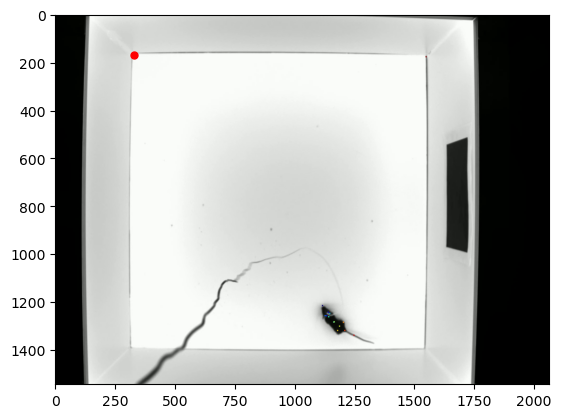

In [ ]:
# TODO: Change the coordinates of the point until 
# it sits on the top left corner of the arena.
point_x = 0
point_y = 0

#### Plotting code
plt.figure()
plt.imshow(img)
plt.scatter(point_x, point_y, c='r', s=25)
plt.show()

### Now set all coordinates relative to our new origin (0, 0)
To do this, index the X and Y coordinates from `head_neck` separately and apply the coordinate shift. Remember to select all rows (`:`) but only the relevant column (refer to Q2.1). Subtract `point_x` / `point_y` from the entire coordinate vector to shift the reference point.

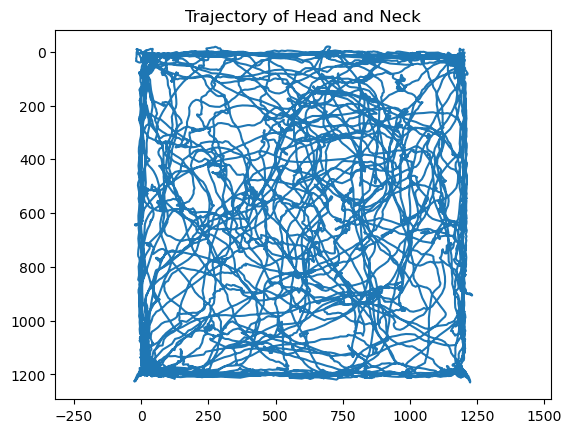

In [ ]:
# TODO: Subtract the reference point from the tracking data
# Hint: head_neck.iloc[:,0] gives you the X column, head_neck.iloc[:,1] gives you Y
head_neck_x = ...
head_neck_y = ...

######## Plot result ########
plt.figure()
plt.plot(head_neck_x, head_neck_y)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title(f'Trajectory of Head and Neck')
plt.show()

## 2. Smoothing
Looking at the trajectory, the data appears jittery due to noise in the tracking. We can smooth it using a **rolling mean** (also called moving average), which is a common technique for smoothing time series data. In Pandas, this is implemented as [`rolling().mean()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html).

### Example of rolling window in pandas

In [38]:
# create example list of numbers
s = pd.Series([1, 2, 3, 4, 5])

def print_nan(x):
    if x.isna().any():
        print("NaN found in window:", x.values)

# print windows as lists, here we use a tricky way to print the values
# and still return a number (mean of the window) to avoid errors
print("Rolling windows:")
windows = s.rolling(window=3, center=True).apply(lambda x: print(x.values) or np.mean(x))

# Look at the mean of the windows, you will notice, 
# that some windows contain NaN values. This is because the
# rolling mean cannot create a full window at the edges of the data.
print("\nMeans of the windows:")
windows

Rolling windows:
[1. 2. 3.]
[2. 3. 4.]
[3. 4. 5.]

Means of the windows:


0    NaN
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

### Calculating the smoothed coordinates
**Question 2.4**: 

Use the `rolling().mean()` function to smooth the X and Y coordinates of the head and neck. Choose a correct value for k. What does the parameter k do? How does the smoothing work?

*Hint: You can try to use time as reference for choosing the value of k.*

---
**Question 2.5:**:

What happens after you increased the k-value? How does the plot change?

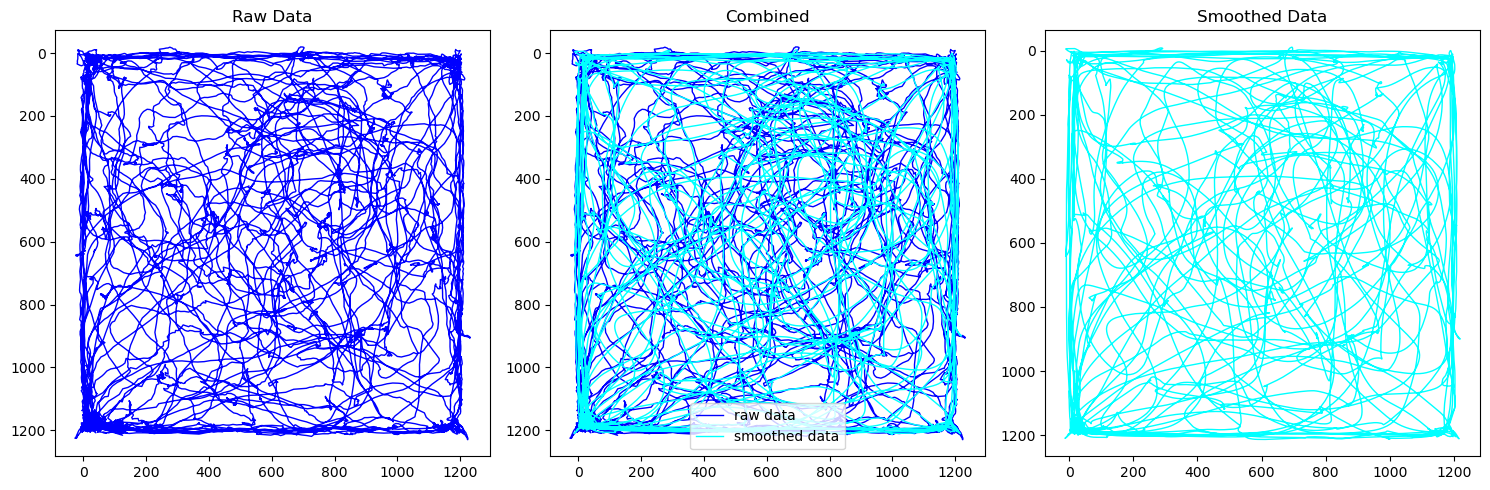

In [ ]:
import pandas as pd

# TODO: Choose a window size k for smoothing
# Think about what makes sense given the frame rate (20 fps)
k = ...

# TODO: Smooth the X and Y coordinates using pd.Series().rolling(window=k, center=True).mean()
smoothed_x = ...
smoothed_y = ...


###### Plotting code ######
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Left subplot: raw data
axes[0].plot(head_neck_x, head_neck_y, 'blue', linewidth=1)
axes[0].invert_yaxis()
axes[0].axis('equal')
axes[0].set_title('Raw Data')

# Center subplot: combined
axes[1].plot(head_neck_x, head_neck_y, 'blue', linewidth=1, label='raw data')
axes[1].plot(smoothed_x, smoothed_y, 'cyan', linewidth=1, label='smoothed data')
axes[1].invert_yaxis()
axes[1].axis('equal')
axes[1].set_title('Combined')
axes[1].legend()

# Right subplot: smoothed data
axes[2].plot(smoothed_x, smoothed_y, 'cyan', linewidth=1)
axes[2].invert_yaxis()
axes[2].axis('equal')
axes[2].set_title('Smoothed Data')

plt.tight_layout()
plt.show()

## 3. First Behavioral Metric — Distance
Now that we have the smoothed trajectory, we can calculate the first behavioral metric: **distance traveled**.

We calculate the distance between consecutive tracking points (adjacent frames) using the **Pythagorean theorem**:

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

First, pick two time-adjacent points from the smoothed data and calculate the distance manually.

**Hints:**
- Square root in NumPy: `np.sqrt()`
- Power operator: `**` or `np.power()`

### First distance calculation
Calculate the distance between the first two consecutive points in the smoothed X and Y coordinate vectors.

In [ ]:
# TODO: Calculate the distance between the first two consecutive smoothed points
# Hint: Use smoothed_x.iloc[0], smoothed_y.iloc[0] for the first point
#       and smoothed_x.iloc[1], smoothed_y.iloc[1] for the second point
from_x = ...
from_y = ...
to_x = ...
to_y = ...

# TODO: Apply the Pythagorean theorem: d = sqrt((to_x - from_x)^2 + (to_y - from_y)^2)
distance = ...
print("Distance between first two points:", distance)

**Question 2.6**: 

Why do we calculate `to_x - from_x` and `to_y - from_y` in the Pythagorean equation? What do these differences represent geometrically?

In [51]:
# Answer:

### Same calculation for all points
Now that you know how to calculate the distance between two points, apply this to all consecutive points in the smoothed data. This will give you a vector of distances between all adjacent frames.

*Hint: NumPy has a function that calculates the difference between consecutive elements: `np.diff()`*

In [ ]:
# Drop NaNs from smoothing and extract all values as numpy arrays
sx = smoothed_x.dropna().values
sy = smoothed_y.dropna().values

# TODO: Calculate the difference between consecutive points using np.diff()
dx = ...
dy = ...

# TODO: Calculate distance per frame using the Pythagorean theorem
# Hint: np.sqrt(dx**2 + dy**2)
distance_per_frame_px = ...

# Check length
print("Distance array length:", len(distance_per_frame_px))

Distance array length: 35980


## 4. Convert to Real-World Units
We have calculated the distance between points in **pixels**, but we want the distance in **centimeters** so we can compare across experiments. We need a calibration factor.

We know that the arena side length is **80 cm**.

---
**Question 2.7**: 

The Pythagorean equation gives us the distance between two points — but in what unit is this distance measured when working with image coordinates?

In [ ]:
# Answer:

### Estimate arena size
We can again use our method from before to find the length of one arena side in pixel. Use the variables point_x and point_y for two points to calculate the length of the arena side in pixel.

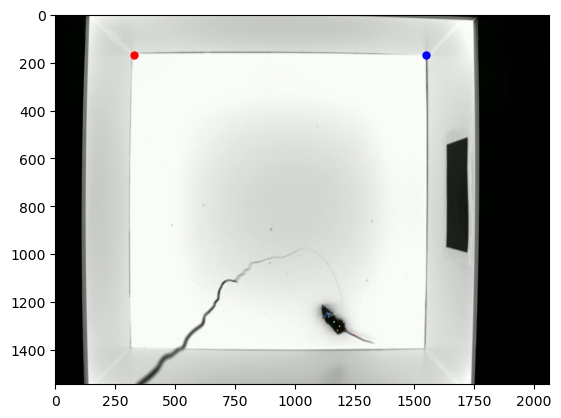

In [ ]:
# Use the reference point from before as one corner of the arena
x1 = point_x
y1 = y2 = point_y

# TODO: Find the X coordinate of the top-right corner of the arena
# Adjust this value until the blue point sits on the top-right arena corner
x2 = 0

#### Plotting code
plt.figure()
plt.imshow(img)
plt.scatter(x1, y1, c='r', s=25)
plt.scatter(x2, y2, c='b', s=25)
plt.show()

### Convert to cm
Now that we know the length of the arena side in pixel, we can calculate the conversion factor from pixel to cm by dividing the length of the arena side in cm (80 cm) by the length of the arena side in pixel. Now we can convert the distance traveled by the animal from pixel to cm by multiplying the distance in pixel with the conversion factor.

**Question 2.8:** 

What is the length of the arena side wall in pixel? What is the cm/pixel ratio?

In [ ]:
# TODO: Calculate the length of the arena side in pixels
side_in_pixel = ...
side_length_cm = 80

# TODO: Calculate the cm-per-pixel ratio
cm_to_px = ...
print("cm per pixel:", cm_to_px)

# TODO: Convert distance from pixels to cm
distance_per_frame_cm = ...

# TODO: Calculate the total distance traveled (sum of all frame distances)
total_dist_cm = ...
print(f"Total distance: {total_dist_cm:.2f} cm ({total_dist_cm/100:.2f} m)")

cm per pixel: 0.06557377049180328
Total distance: 9009.20 cm (90.09 m)


### Total Distance — Important Consideration
`distance_per_frame_cm` contains the distance between each pair of consecutive frames. Summing the entire vector gives us the **total distance** the animal traveled, which typically falls between 80 and 120 meters depending on the smoothing parameter `k`.

> ⚠️ **Caution:** More smoothing means less measured distance, because smoothing removes both noise *and* real small movements. Be careful not to over-smooth!

**Question 2.9:**

How many distance values do we have compared to position values? Why is there a difference?

In [54]:
print(f"Remember, we had {len(distance_per_frame_px)} distance values")

#Answer:

Remember, we had 35980 distance values


## 5. Next Behavioral Metric — Speed
Recall that the camera records at **20 frames per second** (20 Hz). We can use this frame rate to convert distance-per-frame into speed (cm/s).

**Question 2.10:** 
How do you convert the distance per frame to distance per second?

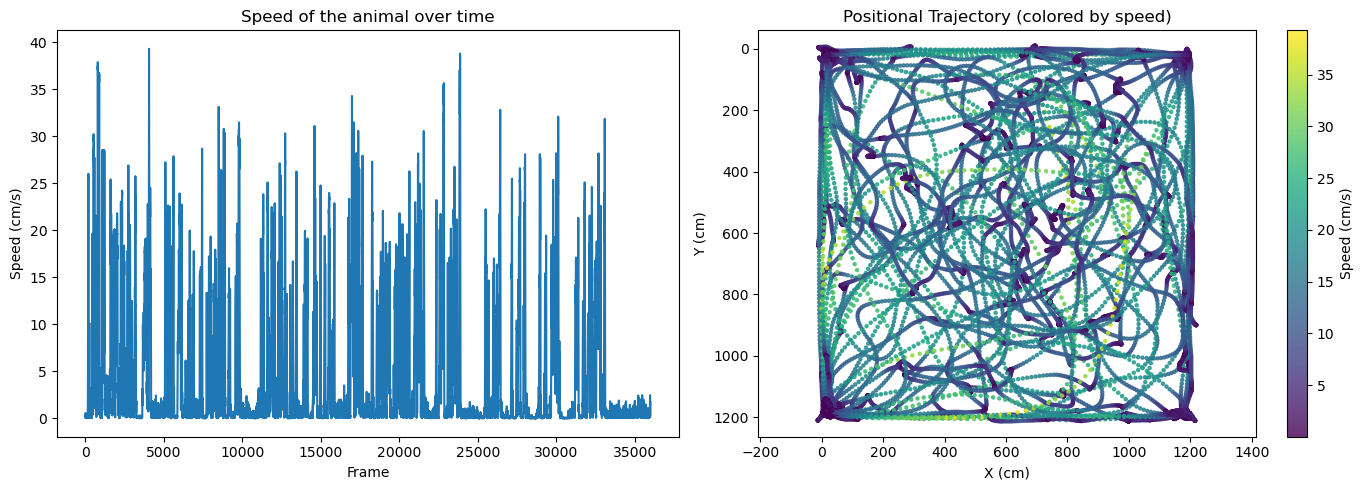

In [ ]:
fps = 20

# TODO: Calculate speed in cm/sec
# Hint: distance per frame * frames per second = distance per second
speed_cm_sec = ...

##### Plotting speed and trajectory
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left subplot: speed over time
axes[0].plot(speed_cm_sec)
axes[0].set_title('Speed of the animal over time')
axes[0].set_xlabel('Frame')
axes[0].set_ylabel('Speed (cm/s)')

# Right subplot: trajectory with speed as color
scatter = axes[1].scatter(sx[:-1], sy[:-1], c=speed_cm_sec, cmap='viridis', s=5, alpha=0.8)
axes[1].set_title('Positional Trajectory (colored by speed)')
axes[1].set_xlabel('X (cm)')
axes[1].set_ylabel('Y (cm)')
axes[1].invert_yaxis()
axes[1].axis('equal')
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Speed (cm/s)')

plt.tight_layout()
plt.show()

---

## Congratulations! 🎉

You have successfully completed **Task 2: Behavioral Metrics**!

You've mastered essential techniques for quantifying animal behavior:
1. ✅ Setting proper reference points for coordinate systems
2. ✅ Smoothing noisy tracking data using rolling means
3. ✅ Calculating Euclidean distances between consecutive frames
4. ✅ Converting pixel measurements to real-world units (cm)
5. ✅ Computing speed from distance and frame rate
6. ✅ Creating informative visualizations (trajectory colored by speed)

**Key Achievement:** You successfully calculated that the animal traveled approximately **80-120 meters** during the recording session and visualized its movement patterns!

These behavioral metrics are fundamental for understanding how animals navigate their environment and form the basis for correlating behavior with neural activity.

**Ready for Task 3!** 🚀